In [101]:
from sys import path
import pandas as pd
import numpy as np

# Adding KELMOR.py to the path
path.append("KELMOR.py") # Replace . by the folder that contains KELMOR.py

# Import KELMOR module and class
kelmor_module = __import__("KELMOR") 
KELMOR = kelmor_module.KELMOR

# Load the dataset
DKI1 = pd.read_excel("DATA ISPU - Normalization_Forecast.xlsx", sheet_name="DKI1")
X_train = DKI1.index.values.reshape(-1, 1)
y_train = DKI1['NO2'].values.reshape(-1,)

gamma_value = 0.03
C_value=100

## Laplacian Kernel

In [102]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="laplacian", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI1['NO2'].min()
max_par = DKI1['NO2'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI1['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'NO2': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI1['NO2'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.115
MSE: 0.013
MAE: 0.099
R-Squared: -1.389
       Tanggal        NO2
0   2022-11-30  15.128205
1   2022-12-01  15.384615
2   2022-12-02  15.384615
3   2022-12-03  15.384615
4   2022-12-04  16.666667
5   2022-12-05  16.666667
6   2022-12-06  16.666667
7   2022-12-07  17.948718
8   2022-12-08  17.948718
9   2022-12-09  17.948718
10  2022-12-10  19.230769
11  2022-12-11  19.230769
12  2022-12-12  19.230769
13  2022-12-13  19.230769
14  2022-12-14  20.512821
15  2022-12-15  20.512821
16  2022-12-16  20.512821
17  2022-12-17  20.512821
18  2022-12-18  20.512821
19  2022-12-19  21.794872
20  2022-12-20  21.794872
21  2022-12-21  21.794872
22  2022-12-22  21.794872
23  2022-12-23  21.794872
24  2022-12-24  21.794872
25  2022-12-25  21.794872
26  2022-12-26  23.076923
27  2022-12-27  23.076923
28  2022-12-28  23.076923
29  2022-12-29  23.076923


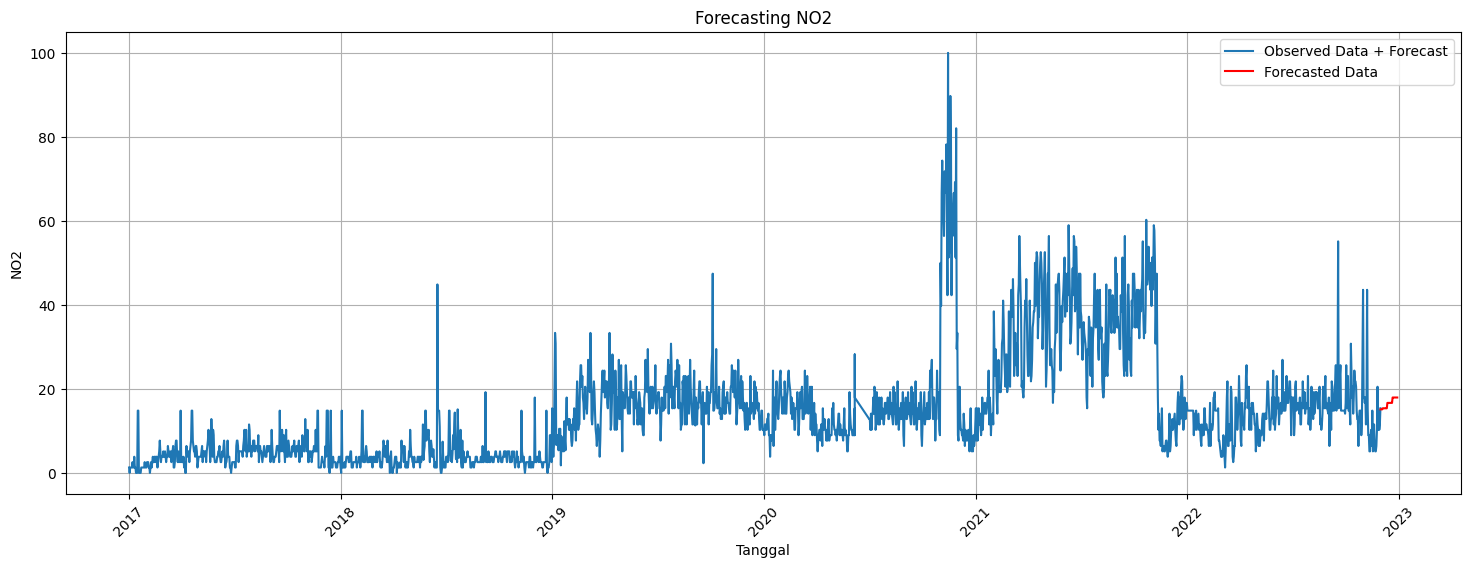

In [92]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI1['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'NO2': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI1[['Tanggal', 'NO2']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI1['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['PM10'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('NO2')
plt.title('Forecasting NO2')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## RBF Kernel

In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="rbf", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI1['NO2'].min()
max_par = DKI1['NO2'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI1['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'NO2': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI1['NO2'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.141
MSE: 0.020
MAE: 0.124
R-Squared: -2.582
       Tanggal        NO2
0   2022-11-30  12.820513
1   2022-12-01  11.538462
2   2022-12-02  11.282051
3   2022-12-03  11.025641
4   2022-12-04  11.025641
5   2022-12-05  11.025641
6   2022-12-06  11.282051
7   2022-12-07  12.307692
8   2022-12-08  14.358974
9   2022-12-09  15.384615
10  2022-12-10  19.230769
11  2022-12-11  21.794872
12  2022-12-12  24.358974
13  2022-12-13  25.641026
14  2022-12-14  25.641026
15  2022-12-15  25.641026
16  2022-12-16  25.641026
17  2022-12-17  24.358974
18  2022-12-18  24.358974
19  2022-12-19  24.358974
20  2022-12-20  24.358974
21  2022-12-21  24.358974
22  2022-12-22  24.358974
23  2022-12-23  24.358974
24  2022-12-24  24.358974
25  2022-12-25  24.358974
26  2022-12-26  24.358974
27  2022-12-27  24.358974
28  2022-12-28  24.358974
29  2022-12-29  24.358974


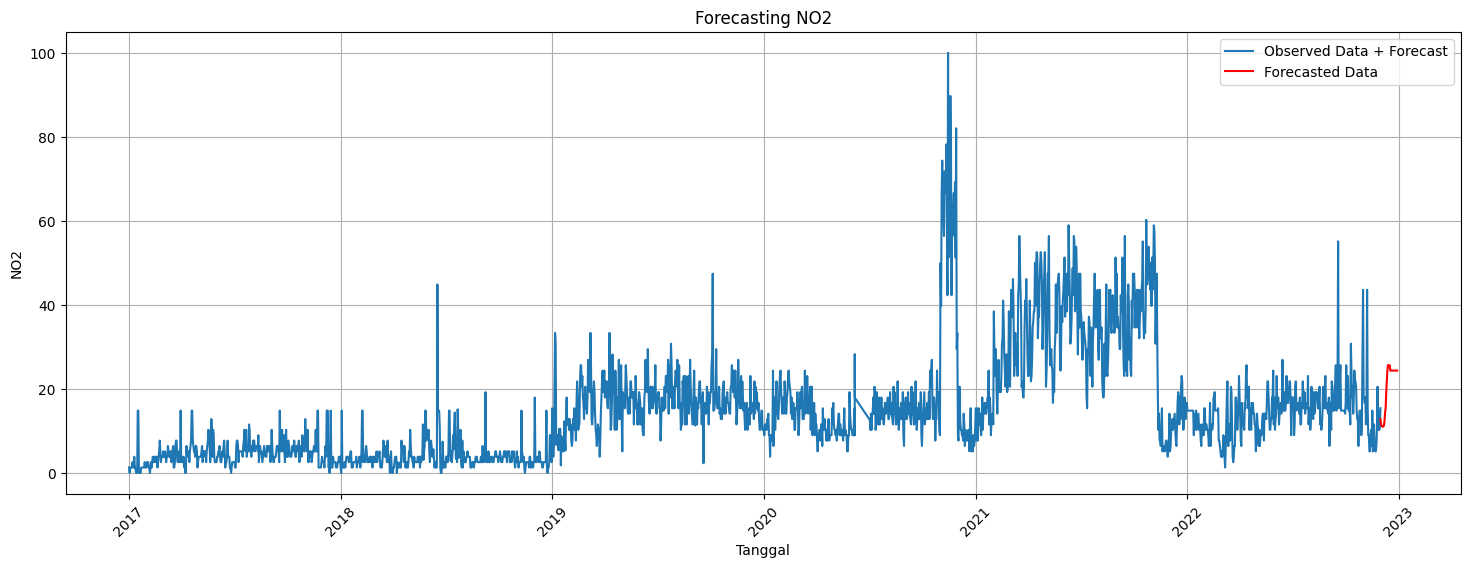

In [94]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI1['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'NO2': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI1[['Tanggal', 'NO2']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI1['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['PM10'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('NO2')
plt.title('Forecasting NO2')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Linear

In [95]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="linear", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI1['NO2'].min()
max_par = DKI1['NO2'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI1['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'NO2': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI1['NO2'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.083
MSE: 0.007
MAE: 0.053
R-Squared: -0.221
       Tanggal       NO2
0   2022-11-30  8.717949
1   2022-12-01  8.717949
2   2022-12-02  8.717949
3   2022-12-03  8.717949
4   2022-12-04  8.717949
5   2022-12-05  8.717949
6   2022-12-06  8.717949
7   2022-12-07  8.717949
8   2022-12-08  8.717949
9   2022-12-09  8.717949
10  2022-12-10  8.717949
11  2022-12-11  8.717949
12  2022-12-12  8.717949
13  2022-12-13  8.717949
14  2022-12-14  8.717949
15  2022-12-15  8.717949
16  2022-12-16  8.717949
17  2022-12-17  8.717949
18  2022-12-18  8.717949
19  2022-12-19  8.717949
20  2022-12-20  8.717949
21  2022-12-21  8.717949
22  2022-12-22  8.717949
23  2022-12-23  8.717949
24  2022-12-24  8.717949
25  2022-12-25  8.717949
26  2022-12-26  8.717949
27  2022-12-27  8.717949
28  2022-12-28  8.717949
29  2022-12-29  8.717949


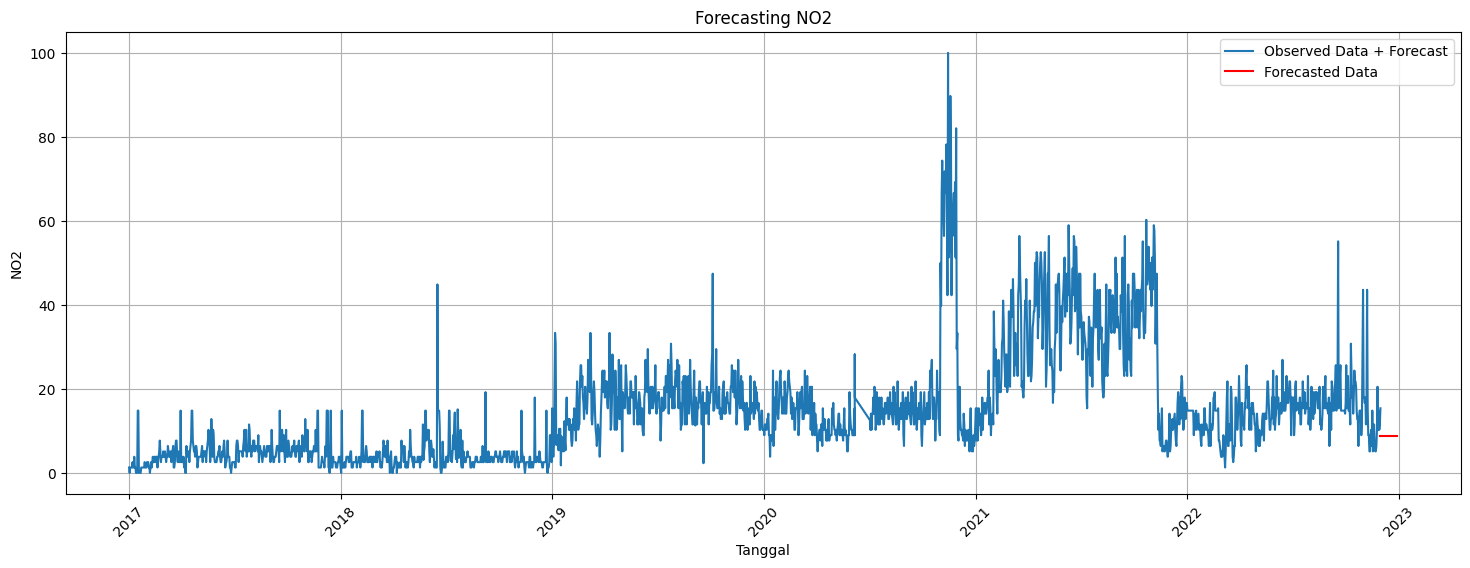

In [96]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI1['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'NO2': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI1[['Tanggal', 'NO2']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI1['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['PM10'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('NO2')
plt.title('Forecasting NO2')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Sigmoid

In [97]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="sigmoid", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI1['NO2'].min()
max_par = DKI1['NO2'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI1['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'NO2': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI1['NO2'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.076
MSE: 0.006
MAE: 0.050
R-Squared: -0.026
       Tanggal        NO2
0   2022-11-30  11.025641
1   2022-12-01  11.025641
2   2022-12-02  11.025641
3   2022-12-03  11.025641
4   2022-12-04  11.025641
5   2022-12-05  11.025641
6   2022-12-06  11.025641
7   2022-12-07  11.025641
8   2022-12-08  11.025641
9   2022-12-09  11.025641
10  2022-12-10  11.025641
11  2022-12-11  11.025641
12  2022-12-12  11.025641
13  2022-12-13  11.025641
14  2022-12-14  11.025641
15  2022-12-15  11.025641
16  2022-12-16  11.025641
17  2022-12-17  11.025641
18  2022-12-18  11.025641
19  2022-12-19  11.025641
20  2022-12-20  11.025641
21  2022-12-21  11.025641
22  2022-12-22  11.025641
23  2022-12-23  11.025641
24  2022-12-24  11.025641
25  2022-12-25  11.025641
26  2022-12-26  11.025641
27  2022-12-27  11.025641
28  2022-12-28  11.025641
29  2022-12-29  11.025641


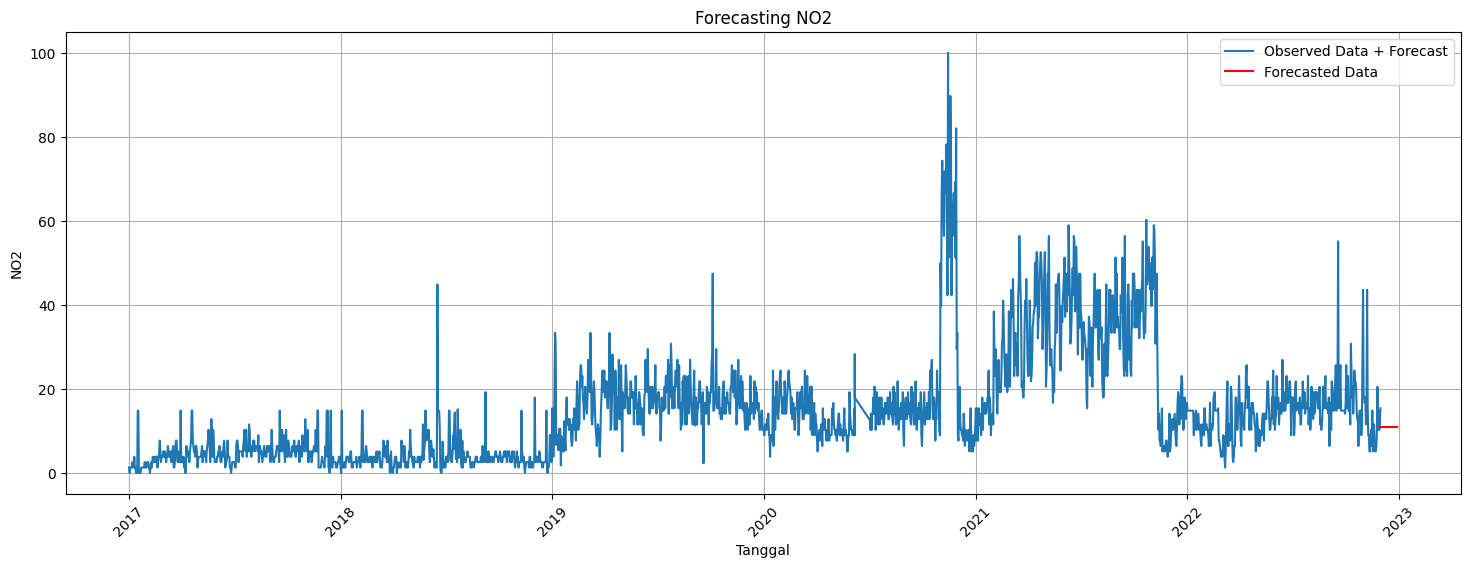

In [98]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI1['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'NO2': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI1[['Tanggal', 'NO2']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI1['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['PM10'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('NO2')
plt.title('Forecasting NO2')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Cosine

In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="cosine", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI1['NO2'].min()
max_par = DKI1['NO2'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI1['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'NO2': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI1['NO2'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.077
MSE: 0.006
MAE: 0.050
R-Squared: -0.053
       Tanggal        NO2
0   2022-11-30  10.512821
1   2022-12-01  10.512821
2   2022-12-02  10.512821
3   2022-12-03  10.512821
4   2022-12-04  10.512821
5   2022-12-05  10.512821
6   2022-12-06  10.512821
7   2022-12-07  10.512821
8   2022-12-08  10.512821
9   2022-12-09  10.512821
10  2022-12-10  10.512821
11  2022-12-11  10.512821
12  2022-12-12  10.512821
13  2022-12-13  10.512821
14  2022-12-14  10.512821
15  2022-12-15  10.512821
16  2022-12-16  10.512821
17  2022-12-17  10.512821
18  2022-12-18  10.512821
19  2022-12-19  10.512821
20  2022-12-20  10.512821
21  2022-12-21  10.512821
22  2022-12-22  10.512821
23  2022-12-23  10.512821
24  2022-12-24  10.512821
25  2022-12-25  10.512821
26  2022-12-26  10.512821
27  2022-12-27  10.512821
28  2022-12-28  10.512821
29  2022-12-29  10.512821


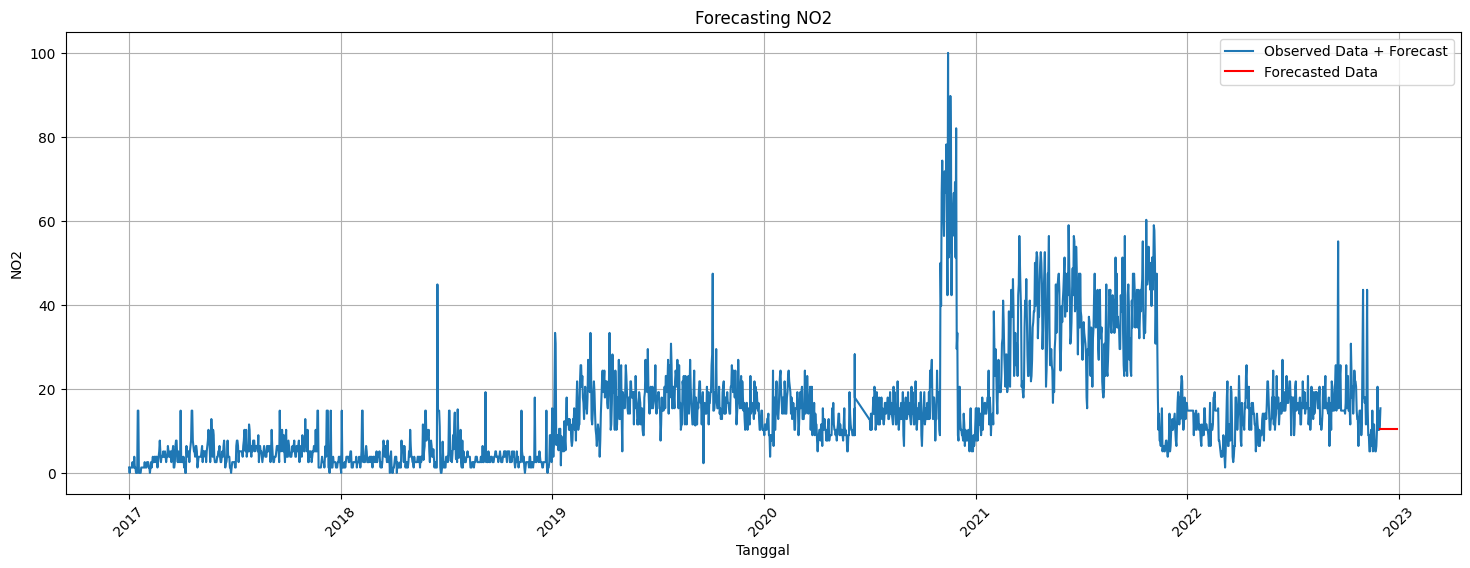

In [100]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI1['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'NO2': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI1[['Tanggal', 'NO2']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI1['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['PM10'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('NO2')
plt.title('Forecasting NO2')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
